In [82]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
#!pip install geocoder
import geocoder
import os
#!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [83]:
import folium # map rendering library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
!pip install geocoder


In [84]:
from pandas import read_excel
# find your sheet name at the bottom left of your excel file and assign 
# it to my_sheet 
my_sheet = 'Sheet1' # change it to your sheet name
file_name = 'battle1.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df.head()) # shows headers with top 5 rows

   ZipCode     City           County
0    73003   Edmond  Oklahoma County
1    73007  Arcadia  Oklahoma County
2    73008  Bethany  Oklahoma County
3    73013   Edmond  Oklahoma County
4    73020  Choctaw  Oklahoma County


In [85]:
df

,ZipCode,City,County
0,73003,Edmond,Oklahoma County
1,73007,Arcadia,Oklahoma County
2,73008,Bethany,Oklahoma County
3,73013,Edmond,Oklahoma County
4,73020,Choctaw,Oklahoma County
5,73034,Edmond,Oklahoma County
6,73045,Harrah,Oklahoma County
7,73049,Jones,Oklahoma County
8,73054,Luther,Oklahoma County
9,73066,Nicoma Park,Oklahoma County


In [86]:
print(df.shape)

(52, 3)


In [87]:
list(df.columns)

['ZipCode', 'City', 'County']

In [88]:
def get_latilong(Zip_Code):
    lati_long_coords=None
    
    while(lati_long_coords is None):
        
        g = geocoder.arcgis('{},Oaklahoma'.format(Zip_Code))
        lati_long_coords = g.latlng
        return lati_long_coords
    
get_latilong("73001")

[35.23763500000007, -98.41210999999998]

In [89]:
list(df.columns)

['ZipCode', 'City', 'County']

In [90]:
df = df.rename(columns = {'Zip Code' : 'ZipCode'})

list(df.columns)

['ZipCode', 'City', 'County']

In [91]:
!pip install geocoder
import geocoder
!pip install geopandas
!pip install geopy

In [92]:
get_latilong("7308")

[35.582683950000046, -97.50859936099994]

In [93]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from sklearn.cluster import KMeans # import k-means from clustering stage

!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup # website scraping libraries and packages in Python from BeautifulSoup 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values

print("Libraries imported.")

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [94]:
import folium # map rendering library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



In [95]:
zip_codes = df["ZipCode"]
coords = [get_latilong(zipcode) for zipcode in zip_codes.tolist()]

df_coords = pd.DataFrame(coords, columns=["latitude","longitude"])
df["latitude"] = df_coords["latitude"]
df["longitude"] = df_coords["longitude"]



In [96]:
df.head()

,ZipCode,City,County,latitude,longitude
0,73003,Edmond,Oklahoma County,35.669245,-97.509180
1,73007,Arcadia,Oklahoma County,35.667075,-97.324550
2,73008,Bethany,Oklahoma County,35.511688,-97.630345
3,73013,Edmond,Oklahoma County,35.631335,-97.559310
4,73020,Choctaw,Oklahoma County,35.496275,-97.270965


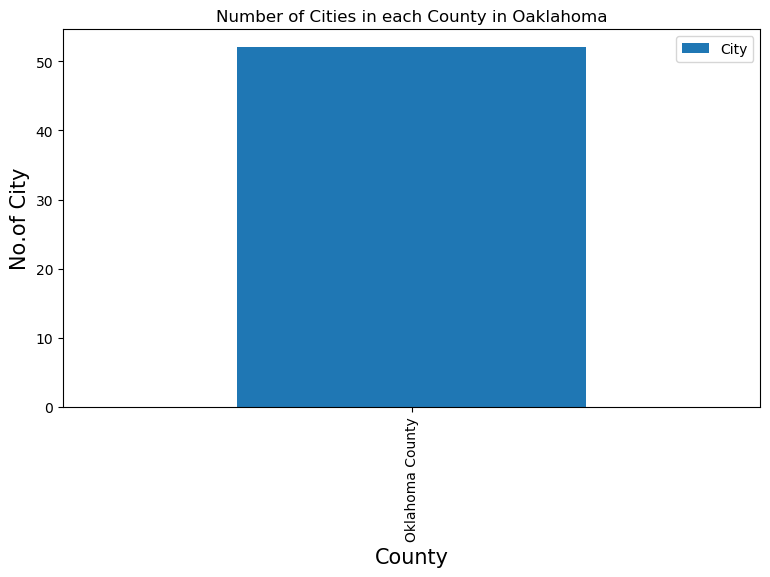

In [97]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Cities in each County in Oaklahoma')
#On x-axis
plt.xlabel('County', fontsize = 15)
#On y-axis
plt.ylabel('No.of City', fontsize=15)
#giving a bar plot
df.groupby('County')['City'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [98]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [99]:
df

,ZipCode,City,County,latitude,longitude
0,73003,Edmond,Oklahoma County,35.669245,-97.509180
1,73007,Arcadia,Oklahoma County,35.667075,-97.324550
2,73008,Bethany,Oklahoma County,35.511688,-97.630345
3,73013,Edmond,Oklahoma County,35.631335,-97.559310
4,73020,Choctaw,Oklahoma County,35.496275,-97.270965
5,73034,Edmond,Oklahoma County,35.651796,-97.477316
6,73045,Harrah,Oklahoma County,35.483965,-97.164160
7,73049,Jones,Oklahoma County,35.563025,-97.289575
8,73054,Luther,Oklahoma County,35.661670,-97.193370
9,73066,Nicoma Park,Oklahoma County,35.492409,-97.324928


In [100]:
df

,ZipCode,City,County,latitude,longitude
0,73003,Edmond,Oklahoma County,35.669245,-97.509180
1,73007,Arcadia,Oklahoma County,35.667075,-97.324550
2,73008,Bethany,Oklahoma County,35.511688,-97.630345
3,73013,Edmond,Oklahoma County,35.631335,-97.559310
4,73020,Choctaw,Oklahoma County,35.496275,-97.270965
5,73034,Edmond,Oklahoma County,35.651796,-97.477316
6,73045,Harrah,Oklahoma County,35.483965,-97.164160
7,73049,Jones,Oklahoma County,35.563025,-97.289575
8,73054,Luther,Oklahoma County,35.661670,-97.193370
9,73066,Nicoma Park,Oklahoma County,35.492409,-97.324928


In [101]:
print(df.groupby('County').count()['City'])

County
Oklahoma County    52
Name: City, dtype: int64


In [102]:
county = df['County'].unique().tolist()

In [103]:
lat_ok = df['latitude'].mean()
lon_ok = df['longitude'].mean()
print('The geographical coordinates of Oklahoma are {},{}'.format(lat_ok,lon_ok))

The geographical coordinates of Oklahoma are 35.520460311538514,-97.49314669423072


In [119]:

CLIENT_ID = 'UCZFKANCGP1KEI354OULIV3NWSBEYQNYUJT24W3WRDI0ZD13' # your Foursquare ID
CLIENT_SECRET = 'OVBYRT1MWB0LY5SAFYHM1NS5IVFOIBA0ZAEFZVSQGRXVNCLJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [120]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
         # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
   
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [121]:
ok_venues = getNearbyVenues(names=df['City'],
                                latitudes=df['latitude'],
                                longitudes=df['longitude'])

Edmond
Arcadia
Bethany
Edmond
Choctaw
Edmond
Harrah
Jones
Luther
Nicoma Park
Edmond
Spencer
Wheatland
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Midwest City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Del City
Oklahoma City
Nichols Hills
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Nichols Hills
Oklahoma City
Oklahoma City
Oklahoma City
Warr Acres
Oklahoma City
Warr Acres
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Oklahoma City
Midwest City
Oklahoma City
Oklahoma City
Oklahoma City


In [123]:
ok_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Edmond,35.669245,-97.509180,Dollar Tree,35.668923,-97.511269,Discount Store
1,Edmond,35.669245,-97.509180,LA Fitness,35.668238,-97.510344,Gym / Fitness Center
2,Edmond,35.669245,-97.509180,Kohl's,35.667590,-97.512160,Department Store
3,Edmond,35.669245,-97.509180,Jack in the Box,35.667106,-97.510512,Fast Food Restaurant
4,Edmond,35.669245,-97.509180,Gold's Gym,35.669350,-97.510645,Gym / Fitness Center
5,Edmond,35.669245,-97.509180,Papa Murphy's,35.666666,-97.509828,Pizza Place
6,Edmond,35.669245,-97.509180,The UPS Store,35.667907,-97.510117,Shipping Store
7,Edmond,35.669245,-97.509180,AT&T,35.667977,-97.510032,Mobile Phone Shop
8,Edmond,35.669245,-97.509180,GameStop,35.666995,-97.510046,Video Game Store
9,Edmond,35.669245,-97.509180,Walmart Pharmacy,35.667480,-97.512686,Pharmacy


In [124]:
"Asian Restaurant" in ok_venues['Venue Category'].unique()

True

In [126]:
to_asian = pd.get_dummies(ok_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_asian['City'] = ok_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [to_asian.columns[-1]] + list(to_asian.columns[:-1])
to_asian = to_asian[fixed_columns]

print(to_asian.shape)
to_asian.head()

(442, 132)


,City,Accessories Store,Airport,American Restaurant,Antique Shop,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Big Box Store,Bookstore,Boutique,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Business Service,Café,Cajun / Creole Restaurant,Chinese Restaurant,Chiropractor,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Deli / Bodega,Department Store,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Ethiopian Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Jazz Club,Jewelry Store,Kids Store,Korean Restaurant,Lake,Library,Liquor Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Post Office,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toll Plaza,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint
0,Edmond,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Edmond,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Edmond,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Edmond,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Edmond,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
to_grouped = to_asian.groupby(["City"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(14, 132)


,City,Accessories Store,Airport,American Restaurant,Antique Shop,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Big Box Store,Bookstore,Boutique,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Business Service,Café,Cajun / Creole Restaurant,Chinese Restaurant,Chiropractor,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Deli / Bodega,Department Store,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Ethiopian Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Jazz Club,Jewelry Store,Kids Store,Korean Restaurant,Lake,Library,Liquor Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Post Office,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toll Plaza,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint
0,Arcadia,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bethany,0.000000,0.0,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.00000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.153846,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.0,0.000000,0.000000,0.000000,0.00000

In [128]:
len(to_grouped[to_grouped["Indian Restaurant"] > 0])


1

In [129]:
len(to_grouped[to_grouped["Asian Restaurant"] > 0])


2

In [130]:
len(to_grouped[to_grouped["Chinese Restaurant"] > 0])


1

In [131]:
len(to_grouped[to_grouped["Fast Food Restaurant"] > 0])


8

In [134]:
len(to_grouped[to_grouped["Burger Joint"] > 0])


4

In [135]:
to_indian = to_grouped[["City","Indian Restaurant"]]


In [136]:
to_indian


,City,Indian Restaurant
0,Arcadia,0.000000
1,Bethany,0.000000
2,Choctaw,0.000000
3,Edmond,0.000000
4,Harrah,0.000000
5,Jones,0.000000
6,Luther,0.000000
7,Midwest City,0.000000
8,Nichols Hills,0.000000
9,Nicoma Park,0.000000


In [138]:
to_asian = to_grouped[["City","Asian Restaurant"]]



In [139]:
to_asian

,City,Asian Restaurant
0,Arcadia,0.000000
1,Bethany,0.153846
2,Choctaw,0.000000
3,Edmond,0.000000
4,Harrah,0.000000
5,Jones,0.000000
6,Luther,0.000000
7,Midwest City,0.000000
8,Nichols Hills,0.000000
9,Nicoma Park,0.000000


In [140]:
to_Chinese = to_grouped[["City","Chinese Restaurant"]]

to_Chinese

,City,Chinese Restaurant
0,Arcadia,0.000000
1,Bethany,0.000000
2,Choctaw,0.000000
3,Edmond,0.000000
4,Harrah,0.000000
5,Jones,0.000000
6,Luther,0.000000
7,Midwest City,0.000000
8,Nichols Hills,0.000000
9,Nicoma Park,0.000000


In [141]:
from sklearn.cluster import KMeans
toclusters = 3

to_clustering = to_indian.drop(["City"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [142]:
to_merged = to_indian.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [144]:
to_merged.rename(columns={"City": "City"}, inplace=True)
to_merged

,City,Asian Restaurant,Cluster Labels
0,Arcadia,0.000000,0
1,Bethany,0.153846,1
2,Choctaw,0.000000,0
3,Edmond,0.000000,0
4,Harrah,0.000000,0
5,Jones,0.000000,0
6,Luther,0.000000,0
7,Midwest City,0.000000,0
8,Nichols Hills,0.000000,0
9,Nicoma Park,0.000000,0


In [145]:
to_merged = to_merged.join(ok_venues.set_index("City"), on="City")

print(to_merged.shape)
to_merged

(442, 9)


,City,Asian Restaurant,Cluster Labels,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arcadia,0.000000,0,35.667075,-97.324550,Subway,35.663933,-97.323572,Sandwich Place
0,Arcadia,0.000000,0,35.667075,-97.324550,Town Of Arcadia,35.663983,-97.324760,Lake
1,Bethany,0.153846,1,35.511688,-97.630345,Papa Angelo's Pizzeria,35.510821,-97.629175,Pizza Place
1,Bethany,0.153846,1,35.511688,-97.630345,Birrieria Diaz,35.511312,-97.630041,Mexican Restaurant
1,Bethany,0.153846,1,35.511688,-97.630345,Stray Dog Cafe,35.511376,-97.629825,American Restaurant
1,Bethany,0.153846,1,35.511688,-97.630345,Ding Asian Fusion,35.511729,-97.625081,Asian Restaurant
1,Bethany,0.153846,1,35.511688,-97.630345,Boom-a-rang Diner,35.511011,-97.629222,Diner
1,Bethany,0.153846,1,35.511688,-97.630345,Thai Sweet Basil Express,35.510750,-97.629349,Asian Restaurant
1,Bethany,0.153846,1,35.511688,-97.630345,United States Postal Service,35.509960,-97.628817,Post Office
1,Bethany,0.153846,1,35.511688,-97.630345,C & J Sporting Goods,35.509996,-97.628309,Sporting Goods Shop


In [147]:

to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

,City,Asian Restaurant,Cluster Labels,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arcadia,0.000000,0,35.667075,-97.324550,Subway,35.663933,-97.323572,Sandwich Place
3,Edmond,0.000000,0,35.669245,-97.509180,Papa Murphy's,35.666666,-97.509828,Pizza Place
3,Edmond,0.000000,0,35.669245,-97.509180,Gold's Gym,35.669350,-97.510645,Gym / Fitness Center
3,Edmond,0.000000,0,35.669245,-97.509180,Jack in the Box,35.667106,-97.510512,Fast Food Restaurant
3,Edmond,0.000000,0,35.669245,-97.509180,Kohl's,35.667590,-97.512160,Department Store
2,Choctaw,0.000000,0,35.496275,-97.270965,Dollar General,35.494875,-97.274380,Discount Store
2,Choctaw,0.000000,0,35.496275,-97.270965,CVS pharmacy,35.493526,-97.273013,Pharmacy
2,Choctaw,0.000000,0,35.496275,-97.270965,Redbox,35.493484,-97.272789,Video Store
2,Choctaw,0.000000,0,35.496275,-97.270965,Pizza Hut,35.493571,-97.269827,Pizza Place
2,Choctaw,0.000000,0,35.496275,-97.270965,Family Dollar,35.493829,-97.271811,Discount Store


In [148]:
#Cluster 0
to_merged.loc[(to_merged['Cluster Labels'] ==0) & (to_merged['Venue Category'] == 'Indian Restaurant') ]

,City,Asian Restaurant,Cluster Labels,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [149]:
to_merged.loc[(to_merged['Cluster Labels'] ==1) & (to_merged['Venue Category'] == 'Indian Restaurant') ]


,City,Asian Restaurant,Cluster Labels,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [150]:
to_merged.loc[(to_merged['Cluster Labels'] ==2) & (to_merged['Venue Category'] == 'Indian Restaurant') ]


,City,Asian Restaurant,Cluster Labels,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Oklahoma City,0.003623,2,35.518945,-97.56007,Kha Zana,35.519988,-97.565005,Indian Restaurant


,City,Asian Restaurant,Cluster Labels,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [154]:
map_clusters = folium.Map(location=[lat_ok, lon_ok],zoom_start=14)

# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster in zip(to_merged['City Latitude'], to_merged['City Longitude'], to_merged['Cluster Labels']):
    
    
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters